# Problem Statement

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)).

The prediction task is to determine whether a person makes over $ 50k a year.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [2]:
# Loading the dataset
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")

In [3]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


# Exploratory Data Analysis (EDA):

In [4]:
# checking the column names
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [5]:
# checking the shape of datatset
df.shape

(32560, 15)

There are 32560 rows and 15 columns in the dataset.

The target column is "Income"

In [6]:
# checking for missing values
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

There are no missing values in the dataset

In [7]:
# Getting the general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Observations:

1. There are no missing values present in the dataset.
2. 6 outof 15 columns are integer datatype.
3. 9 columns are of object datatype

In [8]:
# Checking for numerical and categorical features.

nf = df.select_dtypes(include=[np.number]).columns
cf = df.select_dtypes(include=[np.object]).columns

print('Numerical features in the dataset are:\n',nf,'\n','-'*70,'\n Categorical features in the dataset are:\n',cf)

Numerical features in the dataset are:
 Index(['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss',
       'Hours_per_week'],
      dtype='object') 
 ---------------------------------------------------------------------- 
 Categorical features in the dataset are:
 Index(['Workclass', 'Education', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native_country', 'Income'],
      dtype='object')


In [9]:
# Checking for the value counts
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

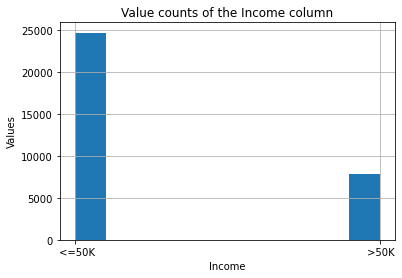

In [10]:
# plotting histogram to show value counts of income column
df['Income'].hist(grid=True)
plt.xlabel('Income')
plt.ylabel('Values')
plt.title('Value counts of the Income column')
plt.show()

This shows that our target column i.e. Income is unbalanced

In [11]:
# checking distribution of workclass
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

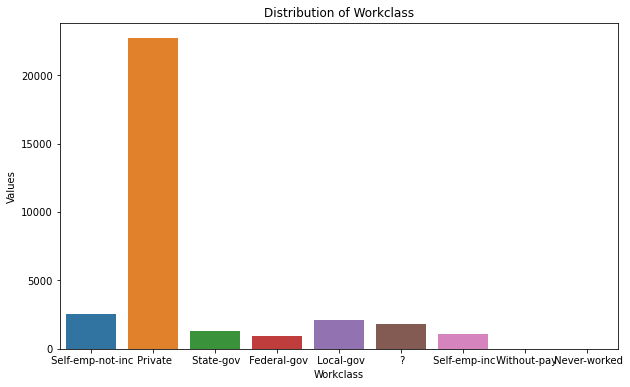

In [12]:
# plotting hisstogram to show distribution of workclass
plt.figure(figsize=[10,6])
sns.countplot(x='Workclass', data=df)
plt.ylabel('Values')
plt.xlabel('Workclass')
plt.title('Distribution of Workclass')
plt.show()

The highest no. of persons work under Private jobs.

In [13]:
# Checking for the distribution of Education column.
df['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

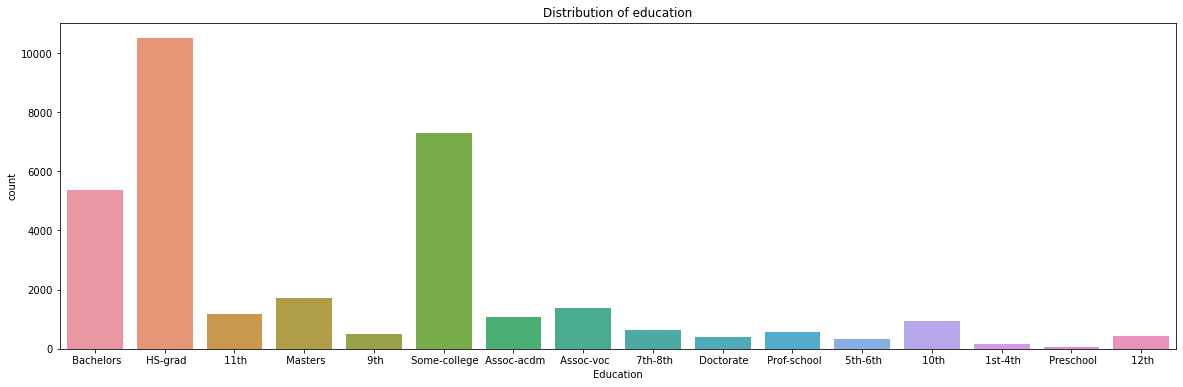

In [14]:
# plotting graph to how distribution of education
plt.figure(figsize=(20,6))
sns.countplot(x='Education', data=df)
plt.title('Distribution of education')
plt.show()

The above graph shows that maximum persons having the High school graduation as their education.

In [15]:
# Checking for the distribution of Occupation column.
df['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

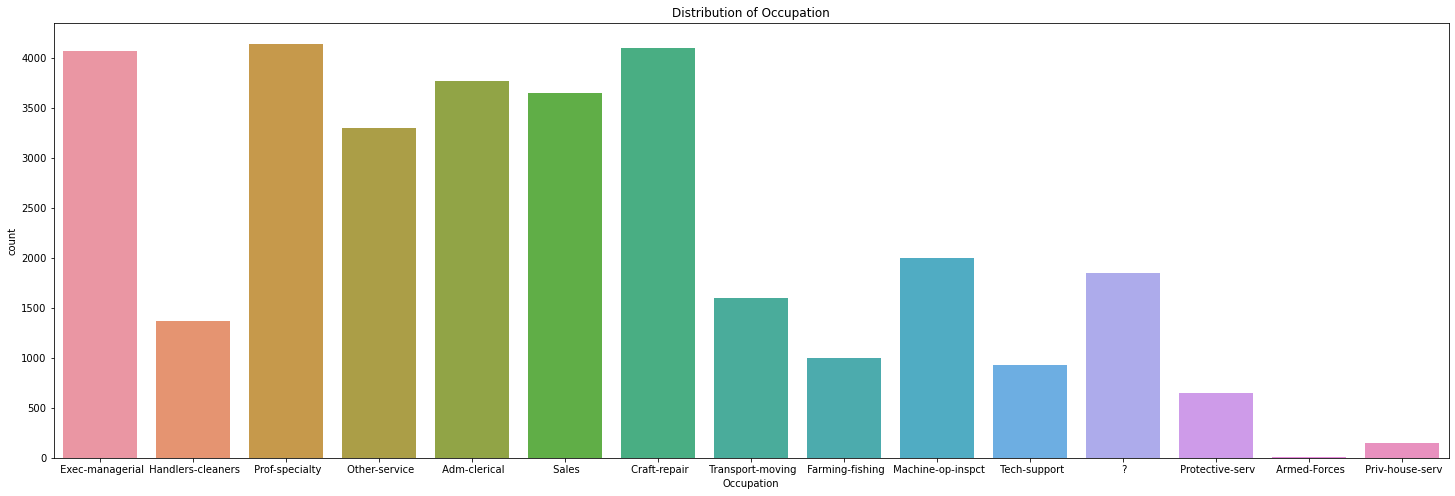

In [16]:
# plotting graph to how distribution of Occupation
plt.figure(figsize=(25,8))
sns.countplot(x='Occupation', data=df)
plt.title('Distribution of Occupation')
plt.show()

In [17]:
# Checking for the value counts of the 'Sex' column

df['Sex'].value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

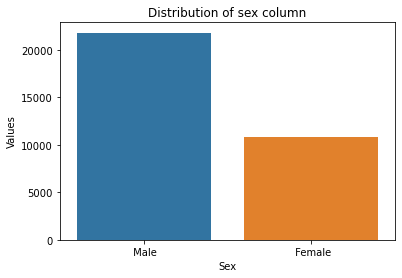

In [18]:
# Plotting graph to show the distribution of 'Sex' column

plt.figure(figsize=[6,4])
sns.countplot(x='Sex', data=df)
plt.ylabel('Values')
plt.xlabel('Sex')
plt.title('Distribution of sex column')
plt.show()

The above observation shows that the number of male is more than female.

In [19]:
# Checking for the value counts of the 'Race' column.
df['Race'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

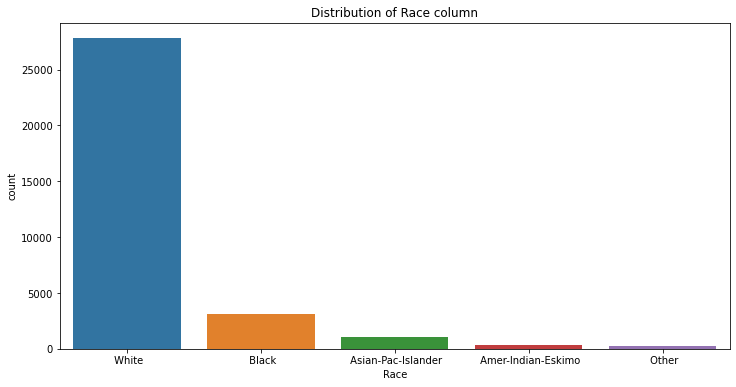

In [20]:
# Showing the distribution of 'Race' column on graph.

plt.figure(figsize=[12,6])
sns.countplot(x='Race', data=df)
plt.title('Distribution of Race column')
plt.show()

Maximum persons are of White race.

# 1.Age Vs Income

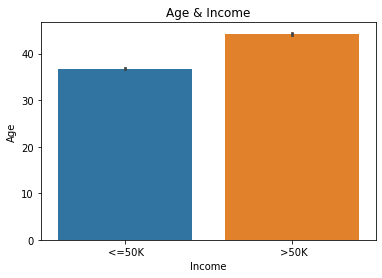

In [21]:
plt.figure(figsize=[6,4])
sns.barplot(x='Income', y='Age', data = df)
plt.xlabel('Income')
plt.ylabel('Age')
plt.title('Age & Income')
plt.show()

The civilians with more age have greater chance to have the income more than 50k

# 2. FinalWeight Vs Income

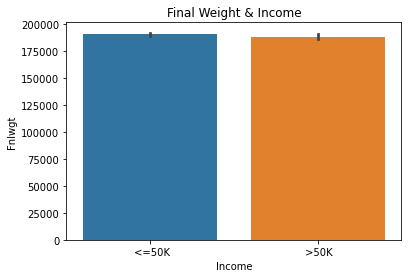

In [22]:
plt.figure(figsize=[6,4])
sns.barplot(x='Income', y='Fnlwgt', data = df)
plt.xlabel('Income')
plt.ylabel('Fnlwgt')
plt.title('Final Weight & Income')
plt.show()

The values are almost same for the income with respect to the final weight column.

# Label Encoding

In [23]:
from sklearn.preprocessing import LabelEncoder

df['Workclass'] = LabelEncoder().fit_transform(df['Workclass'])
df['Education'] = LabelEncoder().fit_transform(df['Education'])
df['Marital_status'] = LabelEncoder().fit_transform(df['Marital_status'])
df['Occupation'] = LabelEncoder().fit_transform(df['Occupation'])
df['Relationship'] = LabelEncoder().fit_transform(df['Relationship'])
df['Race'] = LabelEncoder().fit_transform(df['Race'])
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df['Native_country'] = LabelEncoder().fit_transform(df['Native_country'])
df['Income'] = LabelEncoder().fit_transform(df['Income'])

In [24]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0


In [25]:
# Checking for the datatype of the columns again after labelencoding.

df.dtypes

Age               int64
Workclass         int32
Fnlwgt            int64
Education         int32
Education_num     int64
Marital_status    int32
Occupation        int32
Relationship      int32
Race              int32
Sex               int32
Capital_gain      int64
Capital_loss      int64
Hours_per_week    int64
Native_country    int32
Income            int32
dtype: object

All the columns are converted to integer data type.

# Checking for the data distribution among all the columns

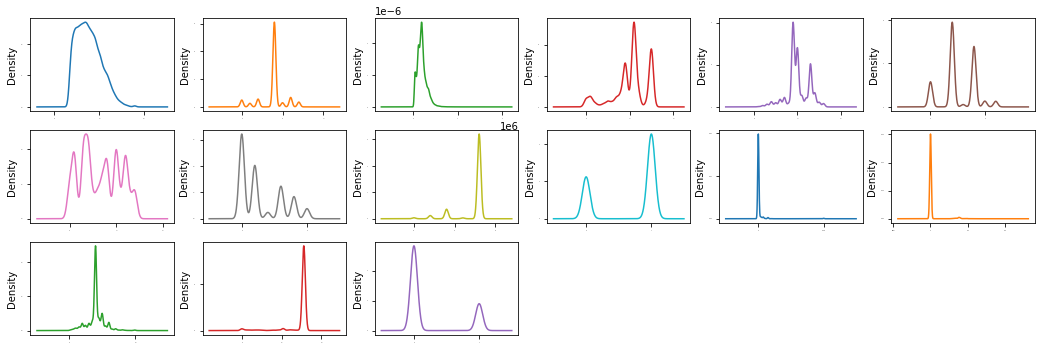

In [26]:
df.plot(kind='density', subplots=True, layout=(6,6), sharex=False, legend=False, fontsize=1, figsize=[18,12])
plt.show()

# Statistical Summary

In [27]:
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.868796,1.897818e+05,10.298249,10.080590,2.611794,6.572912,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.718796,0.240817
std,13.640642,1.455879,1.055498e+05,3.870317,2.572709,1.506225,4.228809,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,7.823892,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783630e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370545e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


1. There is no missing values as said earlier.
2. Minimum age is 17 years and maximum is 90 years.

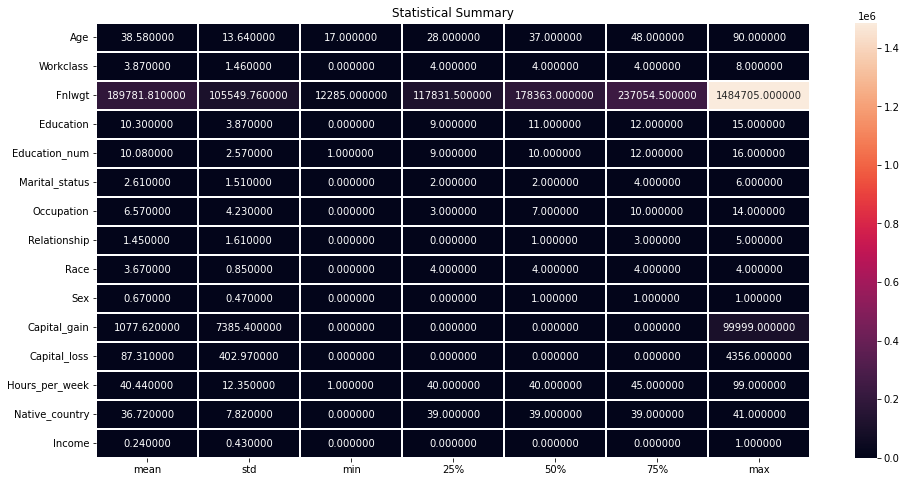

In [28]:
# Plotting heatmap for the statistical summary of the dataset.

plt.figure(figsize=[16,8])
sns.heatmap(round(df.describe()[1:].transpose(),2), annot=True, linewidths=0.25, linecolor='white', fmt='f')
plt.title('Statistical Summary')
plt.show()

# Correlation of variables

In [29]:
df.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.003786,-0.076646,-0.010508,0.036527,-0.266292,-0.020946,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234039
Workclass,0.003786,1.000000,-0.016587,0.023537,0.052015,-0.064798,0.255004,-0.090449,0.049720,0.095942,0.033828,0.012231,0.138974,-0.007710,0.051645
Fnlwgt,-0.076646,-0.016587,1.000000,-0.028156,-0.043159,0.028184,0.001554,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.051957,-0.009481
Education,-0.010508,0.023537,-0.028156,1.000000,0.359172,-0.038398,-0.021274,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.064291,0.079311
Education_num,0.036527,0.052015,-0.043159,0.359172,1.000000,-0.069338,0.109748,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.050831,0.335182
Marital_status,-0.266292,-0.064798,0.028184,-0.038398,-0.069338,1.000000,-0.009617,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.023827,-0.199295
Occupation,-0.020946,0.255004,0.001554,-0.021274,0.109748,-0.009617,1.000000,-0.075620,0.006779,0.080328,0.025511,0.017979,0.080384,-0.012532,0.075448
Relationship,-0.263698,-0.090449,0.008922,-0.010879,-0.094145,0.185461,-0.075620,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.005504,-0.250924
Race,0.028718,0.049720,-0.021278,0.014135,0.031825,-0.068025,0.006779,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.137849,0.071853
Sex,0.088832,0.095942,0.026882,-0.027349,0.012256,-0.129337,0.080328,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,-0.008125,0.215995


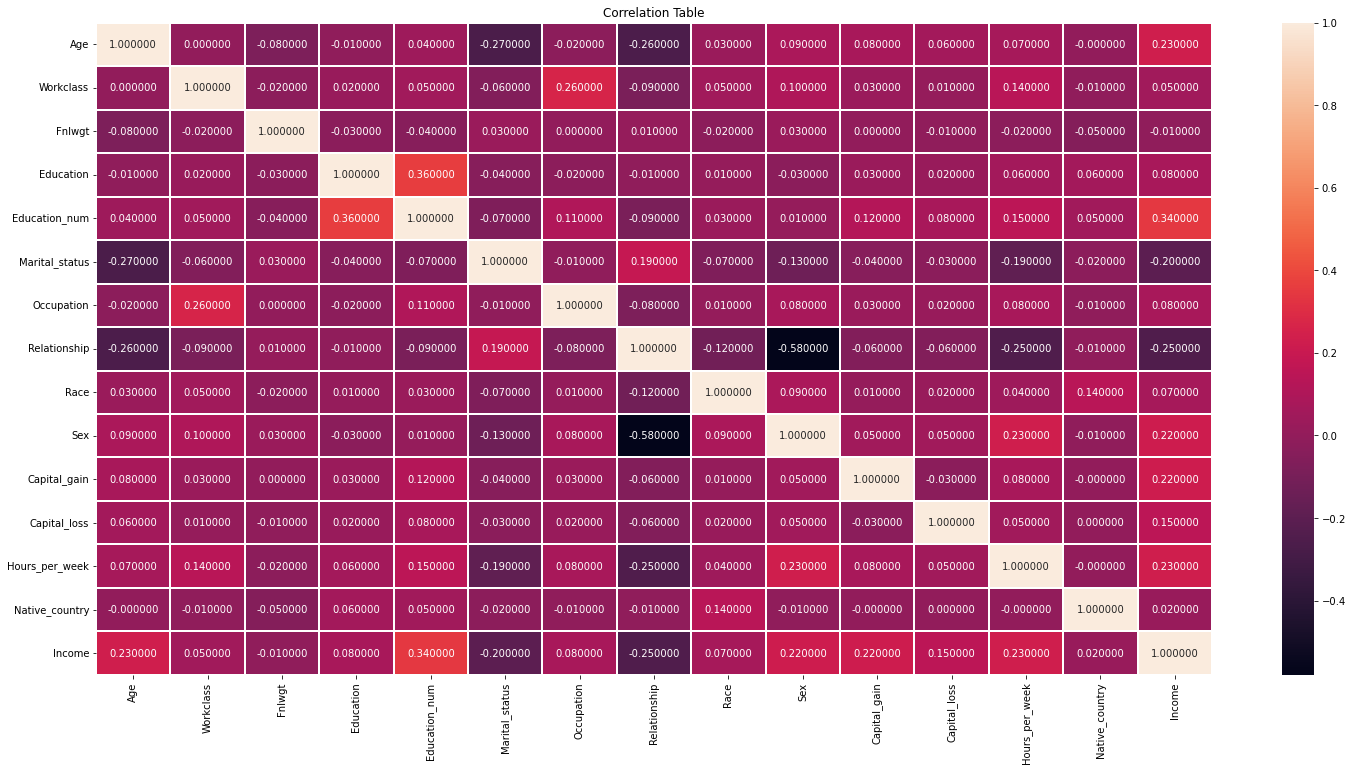

In [30]:
# Plotting Heatmap for the correlation table.

plt.figure(figsize=[25,12])
sns.heatmap(round(df.corr().transpose(),2), annot=True, linewidths=0.45, linecolor='white', fmt='f')
plt.title('Correlation Table')
plt.show()


Outcomes of Correlation Table:

1. 'Education_num' column has the highest correlation with the target column (34%).
2. 'Age' and 'Hours_per_week' columns have 23% correlation with the target column which can be considered as strong bond.
3. 'Sex' and 'Capital_gain' columns have 22% correlation with the target column which can be considered as strong bond.
4. 'Capital_loss' column has 15% correlation with the target column which can be considered as good bond.
5. 'Educaction' and 'Occupation' columns have approx 8% correlation with the target column wwhich can be considered as good bond.
6. 'Race' column has 7% correlation with the target column.
7. 'Workclass' column has 5% correlation with the target column.
8. 'Native_country' has 2% correlation with the target column.
9. 'Fnlwgt', 'Marital_status', and 'Relationship' column have negative correlation with the target column which can be considered as weak bond.

# Outliers Analysis

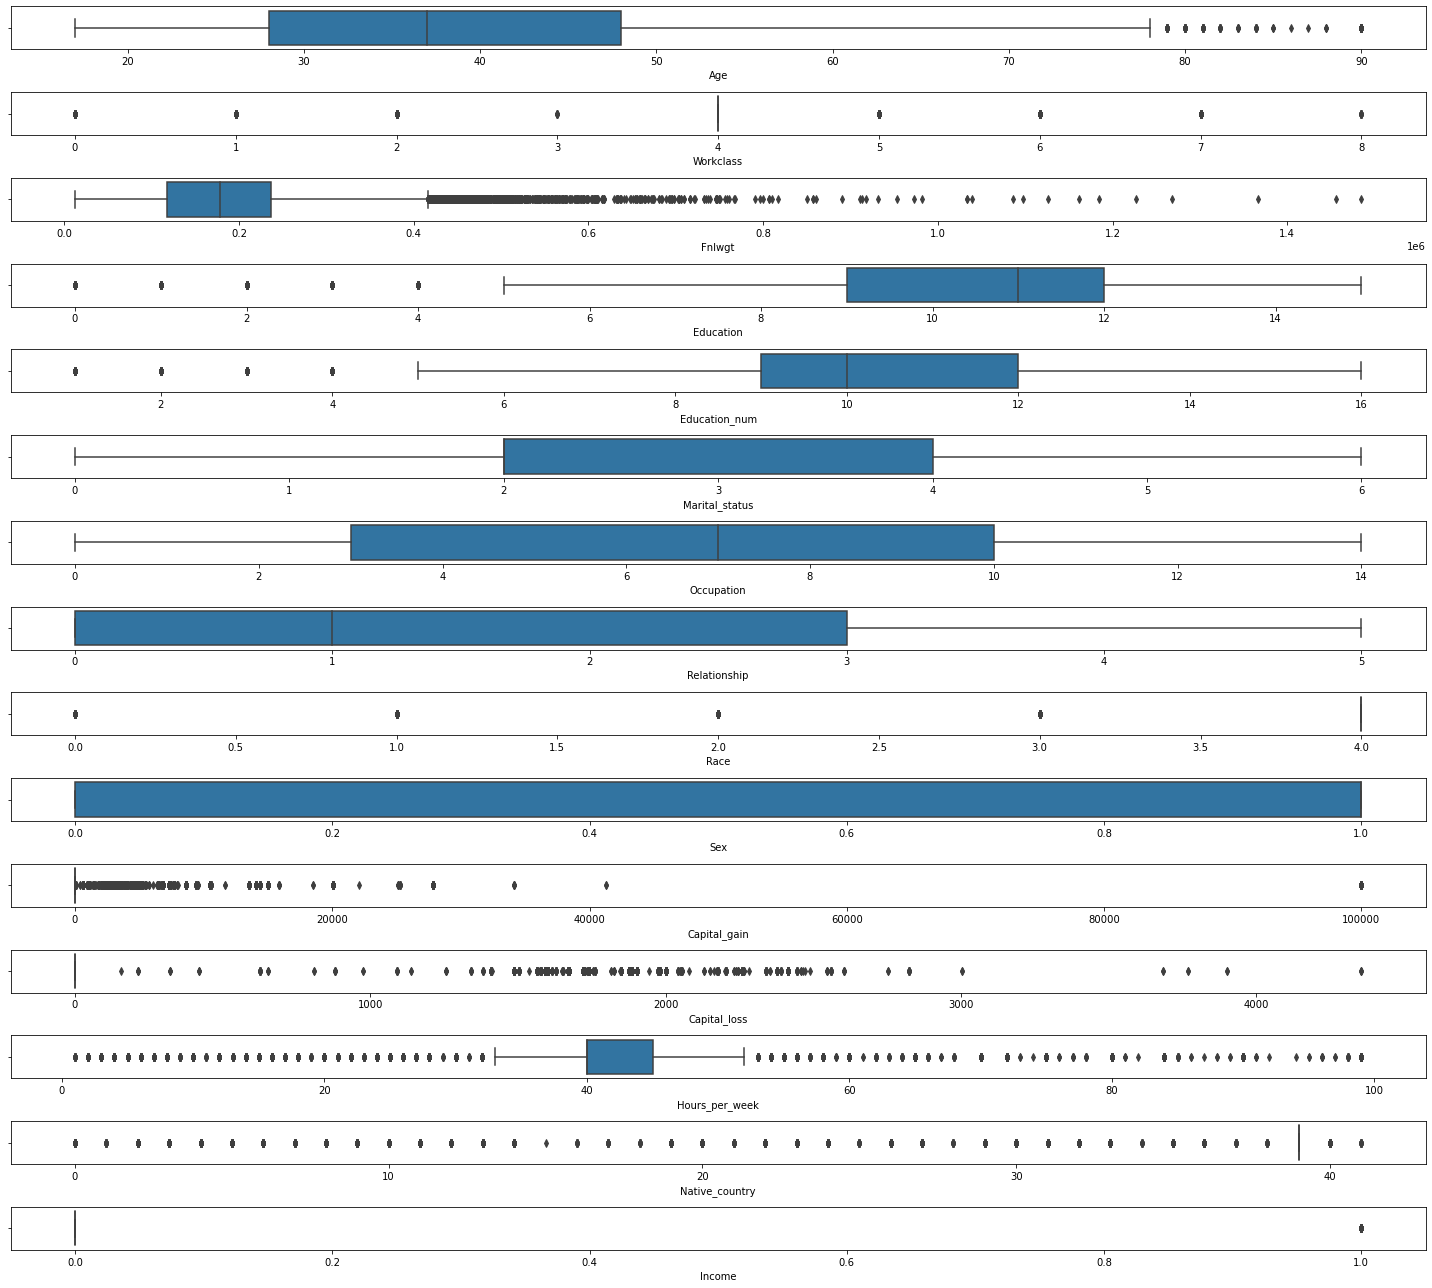

In [31]:
# Plotting boxplot to check the outliers in the dataset:

fig, axs = plt.subplots(15, figsize = (20,18))
plt1 = sns.boxplot(df['Age'], ax = axs[0])
plt2 = sns.boxplot(df['Workclass'], ax = axs[1])
plt3 = sns.boxplot(df['Fnlwgt'], ax = axs[2])
plt4 = sns.boxplot(df['Education'], ax = axs[3])
plt5 = sns.boxplot(df['Education_num'], ax = axs[4])
plt6 = sns.boxplot(df['Marital_status'], ax = axs[5])
plt7 = sns.boxplot(df['Occupation'], ax = axs[6])
plt8 = sns.boxplot(df['Relationship'], ax = axs[7])
plt9 = sns.boxplot(df['Race'], ax = axs[8])
plt10 = sns.boxplot(df['Sex'], ax = axs[9])
plt11 = sns.boxplot(df['Capital_gain'], ax = axs[10])
plt12 = sns.boxplot(df['Capital_loss'], ax = axs[11])
plt13 = sns.boxplot(df['Hours_per_week'], ax = axs[12])
plt14 = sns.boxplot(df['Native_country'], ax = axs[13])
plt15 = sns.boxplot(df['Income'], ax = axs[14])

plt.tight_layout()

# Skewness

In [32]:
# Checking for the skewness in the independent columns.

df.skew()

Age                0.558738
Workclass         -0.752280
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -3.658235
Income             1.212383
dtype: float64

The thershold for the skewness is taken as +0.5 to -0.5. The value outside this is considered as skewed.

The skewed feature columns are:

1.Age 2.Workclass 3.Fnlwgt 4.Education 5.Relationship 6.Race 7.Sex 8.Capital_gain 9.Capital_loss 10.Natice_country

Coulmns without skewness are:

1.Education_num 2.Marital_status 3.Occupation 4.Hours_per_week

# Outliers Removal

zscore technique

In [33]:
from scipy.stats import zscore

z = np.abs(zscore(df))
z.shape 

(32560, 15)

In [34]:
thershold = 3
print (np.where(z>3))

(array([    3,     9,    10, ..., 32532, 32550, 32552], dtype=int64), array([13, 12,  8, ...,  8,  8,  8], dtype=int64))


In [35]:
df_new = df[(z<3).all(axis=1)]
print('The shape of original dataset is ',df.shape)
print('The shape of dataset after removing the outliers is ',df_new.shape)

The shape of original dataset is  (32560, 15)
The shape of dataset after removing the outliers is  (27417, 15)


# Skewness Removal

In [36]:
# Splitting the dataset into independent and dependent variables:

x = df_new.drop("Income", axis=1)
y = df_new["Income"]

In [37]:
# Using power transform method we're removing skewness from the feature columns:
from sklearn.preprocessing import power_transform
x = power_transform(x)
x

array([[ 0.92387928,  1.65209239, -1.12465326, ..., -0.04054646,
        -2.21338681,  0.17213488],
       [ 0.12850238,  0.01669779,  0.41302315, ..., -0.04054646,
        -0.03813668,  0.17213488],
       [ 1.09846907,  0.01669779,  0.59312735, ..., -0.04054646,
        -0.03813668,  0.17213488],
       ...,
       [ 1.37259752,  0.01669779, -0.24852704, ..., -0.04054646,
        -0.03813668,  0.17213488],
       [-1.32725084,  0.01669779,  0.27467596, ..., -0.04054646,
        -1.71987004,  0.17213488],
       [ 1.04117247,  0.80120487,  1.06334322, ..., -0.04054646,
        -0.03813668,  0.17213488]])

# Standard Scaler

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[ 0.92387928,  1.65209239, -1.12465326, ..., -0.04054646,
        -2.21338681,  0.17213488],
       [ 0.12850238,  0.01669779,  0.41302315, ..., -0.04054646,
        -0.03813668,  0.17213488],
       [ 1.09846907,  0.01669779,  0.59312735, ..., -0.04054646,
        -0.03813668,  0.17213488],
       ...,
       [ 1.37259752,  0.01669779, -0.24852704, ..., -0.04054646,
        -0.03813668,  0.17213488],
       [-1.32725084,  0.01669779,  0.27467596, ..., -0.04054646,
        -1.71987004,  0.17213488],
       [ 1.04117247,  0.80120487,  1.06334322, ..., -0.04054646,
        -0.03813668,  0.17213488]])

# Handling data imbalance by oversampling

In [39]:
from imblearn.over_sampling import SMOTE
Sm = SMOTE()
x_over, y_over = Sm.fit_resample(x,y)

In [40]:
y_over.value_counts()

0    21279
1    21279
Name: Income, dtype: int64

# Model Training

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=43)

# 1. LogisticRegression

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

lr = LogisticRegression()
lr.fit(x_train,y_train)
predlr = lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.8276365152146727
[[7004  458]
 [1196  938]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      7462
           1       0.67      0.44      0.53      2134

    accuracy                           0.83      9596
   macro avg       0.76      0.69      0.71      9596
weighted avg       0.81      0.83      0.81      9596



# 2. RandomForestClassifier

In [44]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(x_train, y_train)
predRF = RF.predict(x_test)
print(accuracy_score(y_test, predRF))
print(confusion_matrix(y_test, predRF))
print(classification_report(y_test, predRF))

0.8512922050854522
[[6930  532]
 [ 895 1239]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7462
           1       0.70      0.58      0.63      2134

    accuracy                           0.85      9596
   macro avg       0.79      0.75      0.77      9596
weighted avg       0.84      0.85      0.85      9596



# 3. DecisionTreeClassifier

In [45]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt = dt.predict(x_test)
print(accuracy_score(y_test, preddt))
print(confusion_matrix(y_test, preddt))
print(classification_report(y_test, preddt))

0.8102334305960817
[[6543  919]
 [ 902 1232]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      7462
           1       0.57      0.58      0.58      2134

    accuracy                           0.81      9596
   macro avg       0.73      0.73      0.73      9596
weighted avg       0.81      0.81      0.81      9596



# 4. K-Nearest Neighbors

In [46]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
predknn = knn.predict(x_test)

print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test,predknn))

0.8255523134639433
[[6711  751]
 [ 923 1211]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      7462
           1       0.62      0.57      0.59      2134

    accuracy                           0.83      9596
   macro avg       0.75      0.73      0.74      9596
weighted avg       0.82      0.83      0.82      9596



# Cross validation score:

In [47]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(lr,x,y,cv=5)
print('Cross validation score for LogisticRegression is ',scr.mean())

scr = cross_val_score(RF,x,y,cv=5)
print('Cross validation score for RandomForest is', scr.mean())

scr = cross_val_score(dt,x,y,cv=5)
print('Cross validation score for DecisionTree is ', scr.mean())

scr = cross_val_score(knn,x,y,cv=5)
print('Cross validation score for K-Nearest Neighbors is', scr.mean())

Cross validation score for LogisticRegression is  0.8285736178384671
Cross validation score for RandomForest is 0.8527191998396211
Cross validation score for DecisionTree is  0.8053031430748152
Cross validation score for K-Nearest Neighbors is 0.8236497985351713


# Mean Absolute Error

In [48]:
from sklearn.metrics import mean_absolute_error

print(' Mean absolute error for Logistic Regression is ', mean_absolute_error(y_test,predlr),
      '\n Mean absolute error for  Random Forest Classifier is' , mean_absolute_error(y_test,predRF),
      '\n Mean absolute error for  Decision Forest Classifier is' , mean_absolute_error(y_test,preddt),
      '\n Mean absolute error for K-Nearest Neighbors is ' , mean_absolute_error(y_test,predknn))

 Mean absolute error for Logistic Regression is  0.17236348478532723 
 Mean absolute error for  Random Forest Classifier is 0.14870779491454772 
 Mean absolute error for  Decision Forest Classifier is 0.1897665694039183 
 Mean absolute error for K-Nearest Neighbors is  0.1744476865360567


# Root Mean Squared Error

In [49]:
from sklearn import metrics
rmse_lr=np.sqrt(metrics.mean_squared_error(y_test,predlr))
rmse_rf=np.sqrt(metrics.mean_squared_error(y_test,predRF))
rmse_dt=np.sqrt(metrics.mean_squared_error(y_test,preddt))
rmse_knn=np.sqrt(metrics.mean_squared_error(y_test,predknn))

print("Root mean square error for Logistic Regression is ", rmse_lr)
print("Root Mean Square error for Random Forest Classifier is ", rmse_rf)
print("Root Mean Square Error for Decision Tree Classifier is ", rmse_dt)
print("Root Mean Square Error for K-Nearest Neighbors is ", rmse_knn)

Root mean square error for Logistic Regression is  0.4151668156119022
Root Mean Square error for Random Forest Classifier is  0.38562649664480747
Root Mean Square Error for Decision Tree Classifier is  0.43562204880368294
Root Mean Square Error for K-Nearest Neighbors is  0.4176693507262134


# R2 Score

In [51]:
from sklearn.metrics import r2_score

print('R2 score for logistic regression is ' , r2_score(y_test,predlr),
      '\nR2 score for Random ForestClassifier is ' , r2_score(y_test,predRF),
      '\nR2 score for Decision Tree Classifier is ' , r2_score(y_test,preddt),
      '\nR2 score for K-Nearest NeighbHyper parameter tuningors is ' , r2_score(y_test,predknn))

R2 score for logistic regression is  0.003273317077692073 
R2 score for Random ForestClassifier is  0.14006712422603784 
R2 score for Decision Tree Classifier is  -0.0973635366393728 
R2 score for K-Nearest NeighbHyper parameter tuningors is  -0.008779000732734854


# Hyper parameter tuning

In [52]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [53]:
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

In [54]:
random_search = RandomizedSearchCV(RandomForestClassifier(), param_grid)


In [55]:
random_search.fit(x_train, y_train)
print(random_search.best_estimator_)

RandomForestClassifier(max_depth=6, max_features=None, max_leaf_nodes=9,
                       n_estimators=50)


In [56]:
model_random = RandomForestClassifier(max_depth=6,
                                      max_features='sqrt',
                                      max_leaf_nodes=9,
                                      n_estimators=50)
model_random.fit(x_train, y_train)
y_pred_rand = model_random.predict(x_test)
print(classification_report(y_pred_rand, y_test))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91      8354
           1       0.44      0.76      0.56      1242

    accuracy                           0.85      9596
   macro avg       0.70      0.81      0.73      9596
weighted avg       0.89      0.85      0.86      9596



# AUC ROC Curve

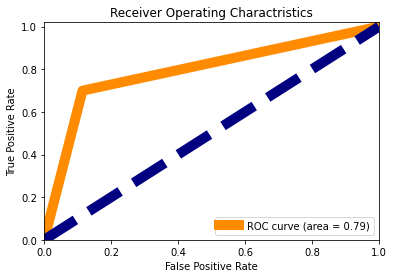

In [57]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(predRF, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr,tpr, color ='darkorange', lw=10, label ='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0,1],[0,1], color='navy', lw=10, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Charactristics')
plt.legend(loc='lower right')

plt.show()

# Saving the final model:

In [58]:
import pickle
filename = 'census_income.pkl'
pickle.dump(RF, open(filename, 'wb'))

# Conclusion

In [59]:
a = np.array(y_test)
predicted = np.array(RF.predict(x_test))
df_conclusion = pd.DataFrame({"Original":a, "Predicted":predicted}, index=range(len(a)))

df_conclusion

,Original,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
9591,0,0
9592,0,0
9593,0,0
9594,0,0
